# Machine Learning Nanodegree


## Project: **Stock Price Estimator** 
***
In this project proposal I intend to leverage an ipython notebook for initial exploratory analysis.

---


## Import Packages

In [2]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import cv2

%matplotlib inline

## Read in the Broadcom(AVGO) csv

The spreadhseet was downloaded from Yahoo Finance. It is also part of the capstone project repository

In [3]:
df = pd.read_csv('./AVGO.csv')

## Output Some Information from the DataFrame

In [4]:
df.head(8)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-29,179.699997,180.669998,178.630005,179.869995,176.403351,1367100
1,2016-12-30,180.369995,180.899994,176.020004,176.770004,173.363113,2542100
2,2017-01-03,178.289993,180.899994,176.539993,178.339996,174.902847,3209800
3,2017-01-04,178.259995,179.000000,176.679993,177.070007,173.657318,2396500
4,2017-01-05,176.330002,177.000000,173.880005,174.279999,170.921097,2486100
5,2017-01-06,174.210007,176.899994,173.309998,176.589996,173.186569,2314200
6,2017-01-09,176.649994,178.300003,176.639999,176.970001,173.559265,2026500
7,2017-01-10,177.490005,180.740005,176.899994,180.570007,177.089890,3018100


## Reverse all Rows

There is a need to reverse all the rows since the date increases and does not decrease.

In [5]:
df = df.iloc[::-1]

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
251,2017-12-28,260.160004,260.799988,258.549988,260.420013,260.420013,1364100
250,2017-12-27,258.839996,261.609985,258.500000,259.119995,259.119995,3561500
249,2017-12-26,257.230011,262.350006,253.389999,258.100006,258.100006,2225600
248,2017-12-22,261.820007,263.369995,258.700012,262.350006,262.350006,1461700
247,2017-12-21,265.950012,266.250000,261.070007,261.529999,261.529999,1775800


In [7]:
df = pd.DataFrame(data = df)
df = df.reset_index()


In [8]:
del df['index']

In [9]:
df['Open'][0:7]

0    260.160004
1    258.839996
2    257.230011
3    261.820007
4    265.950012
5    266.140015
6    263.299988
Name: Open, dtype: float64

In [10]:
#Have a look at some summary stats
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,235.887103,238.016785,233.202976,235.854842,233.100993,2.790617e+06
std,23.962485,24.298570,23.209570,23.758057,24.428293,1.462835e+06
min,174.210007,176.899994,173.309998,174.279999,170.921097,8.486000e+05
25%,218.945000,221.322506,217.730003,218.967502,215.674461,1.874200e+06
50%,241.324997,243.235001,238.714997,241.099998,238.841652,2.448900e+06
75%,251.845001,253.774994,248.672501,251.537502,248.703785,3.098500e+06
max,284.859985,285.679993,279.769989,284.619995,282.745575,1.205030e+07


In [11]:
# This output should have the most recent dates on top
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-28,260.160004,260.799988,258.549988,260.420013,260.420013,1364100
1,2017-12-27,258.839996,261.609985,258.500000,259.119995,259.119995,3561500
2,2017-12-26,257.230011,262.350006,253.389999,258.100006,258.100006,2225600
3,2017-12-22,261.820007,263.369995,258.700012,262.350006,262.350006,1461700
4,2017-12-21,265.950012,266.250000,261.070007,261.529999,261.529999,1775800
5,2017-12-20,266.140015,266.350006,262.779999,265.640015,265.640015,1984500
6,2017-12-19,263.299988,265.290009,261.269989,263.700012,263.700012,1909400
7,2017-12-18,264.079987,266.510010,262.589996,264.390015,264.390015,2978600
8,2017-12-15,261.649994,266.000000,258.260010,265.730011,263.980011,4509100
9,2017-12-14,262.339996,263.000000,256.700012,259.339996,257.632080,3759500


In [12]:
len(df['Open'])

252

## Save first 1 day worth of data

The First day's worth of data need to be saved. The current day will not be aware of the next day's Adjusted Closing Price. Infact this is something that we will need to predict. 

In [13]:
avgo_first_day= df[0:1].copy(deep = True)

In [14]:
avgo_first_day

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-28,260.160004,260.799988,258.549988,260.420013,260.420013,1364100


## DataFrame with Remaining Data

I have a new data frame with data from entry index 7 onwards.

In [15]:
rem_data = df[1:].copy(deep=True)

## Difference between High and Low Stock Price

This may prove to be a useful metric in the project so have a new column

In [16]:
rem_data['High - Low'] = rem_data['High'] - rem_data['Low']

In [17]:
rem_data.head(8)


,Date,Open,High,Low,Close,Adj Close,Volume,High - Low
1,2017-12-27,258.839996,261.609985,258.500000,259.119995,259.119995,3561500,3.109985
2,2017-12-26,257.230011,262.350006,253.389999,258.100006,258.100006,2225600,8.960007
3,2017-12-22,261.820007,263.369995,258.700012,262.350006,262.350006,1461700,4.669983
4,2017-12-21,265.950012,266.250000,261.070007,261.529999,261.529999,1775800,5.179993
5,2017-12-20,266.140015,266.350006,262.779999,265.640015,265.640015,1984500,3.570007
6,2017-12-19,263.299988,265.290009,261.269989,263.700012,263.700012,1909400,4.020020
7,2017-12-18,264.079987,266.510010,262.589996,264.390015,264.390015,2978600,3.920014
8,2017-12-15,261.649994,266.000000,258.260010,265.730011,263.980011,4509100,7.739990


In [18]:
rem_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,High - Low
247,2017-01-05,176.330002,177.000000,173.880005,174.279999,170.921097,2486100,3.119995
248,2017-01-04,178.259995,179.000000,176.679993,177.070007,173.657318,2396500,2.320007
249,2017-01-03,178.289993,180.899994,176.539993,178.339996,174.902847,3209800,4.360001
250,2016-12-30,180.369995,180.899994,176.020004,176.770004,173.363113,2542100,4.879990
251,2016-12-29,179.699997,180.669998,178.630005,179.869995,176.403351,1367100,2.039993


## Setup to derive seven ensuing days of data

I have a new column. This will eventually become all my predictions.
Thus, i will have to appropriatley extract "day1 prices" from 1 day ahead to the end minus one day.

In [19]:
day1 = df['Adj Close'][0:-1].copy(deep=True)

In [20]:
day1.head()

0    260.420013
1    259.119995
2    258.100006
3    262.350006
4    261.529999
Name: Adj Close, dtype: float64

## Setup new data frames and reset indices

It is of paramount importance to setup new dataframes and reset indices. Without this it is going to be very tricky to combine the dataframes. It is possible to copy in various ways. However, not doing the correct way will result in nasty warnings despite working. The steps below throw out NO warnings.

In [21]:
d1 = pd.DataFrame(data = day1)

In [22]:
d1 = d1.rename(columns={'Adj Close': 'Day 1'})
d1 = d1.reset_index()


## Delete Index columns

Deleting index columns will make it easy to concat the various individual data frames.

In [23]:
del d1['index']
d1.head()

,Day 1
0,260.420013
1,259.119995
2,258.100006
3,262.350006
4,261.529999


In [24]:
rem_data = rem_data.reset_index()
del rem_data['index']
rem_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,High - Low
0,2017-12-27,258.839996,261.609985,258.500000,259.119995,259.119995,3561500,3.109985
1,2017-12-26,257.230011,262.350006,253.389999,258.100006,258.100006,2225600,8.960007
2,2017-12-22,261.820007,263.369995,258.700012,262.350006,262.350006,1461700,4.669983
3,2017-12-21,265.950012,266.250000,261.070007,261.529999,261.529999,1775800,5.179993
4,2017-12-20,266.140015,266.350006,262.779999,265.640015,265.640015,1984500,3.570007


## Concat various data frames to create the AVGO dataframe

The "avgo" dataframe is the data frame that will be used for further analysis in the project.
This updated data frame has the column "Day 1" which will be our target "y" or prediction labels. 

In [25]:
avgo = pd.concat([rem_data,d1], axis = 1, join='inner')

In [26]:
avgo.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,High - Low,Day 1
0,2017-12-27,258.839996,261.609985,258.500000,259.119995,259.119995,3561500,3.109985,260.420013
1,2017-12-26,257.230011,262.350006,253.389999,258.100006,258.100006,2225600,8.960007,259.119995
2,2017-12-22,261.820007,263.369995,258.700012,262.350006,262.350006,1461700,4.669983,258.100006
3,2017-12-21,265.950012,266.250000,261.070007,261.529999,261.529999,1775800,5.179993,262.350006
4,2017-12-20,266.140015,266.350006,262.779999,265.640015,265.640015,1984500,3.570007,261.529999
5,2017-12-19,263.299988,265.290009,261.269989,263.700012,263.700012,1909400,4.020020,265.640015
6,2017-12-18,264.079987,266.510010,262.589996,264.390015,264.390015,2978600,3.920014,263.700012
7,2017-12-15,261.649994,266.000000,258.260010,265.730011,263.980011,4509100,7.739990,264.390015
8,2017-12-14,262.339996,263.000000,256.700012,259.339996,257.632080,3759500,6.299988,263.980011
9,2017-12-13,260.410004,263.290009,260.179993,262.029999,260.304352,2694300,3.110016,257.632080


## Display Some Plots

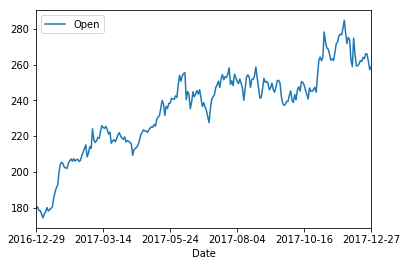

In [27]:
avgo.plot(x = 'Date', y = 'Open')
plt.gca().invert_xaxis()
plt.show()

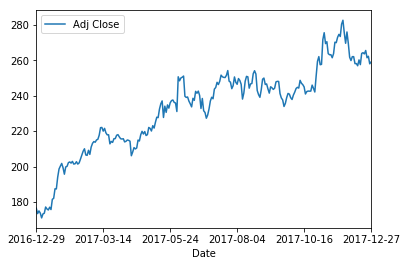

In [28]:
avgo.plot(x = 'Date', y = 'Adj Close')
plt.gca().invert_xaxis()
plt.show()

In [86]:
avgo = avgo.iloc[::-1]
avgo = avgo.reset_index()
del avgo['index']

avgo.head()

,Date,Open,High,Low,Close,Adj Close,Volume,High - Low,Day 1
0,2016-12-29,179.699997,180.669998,178.630005,179.869995,176.403351,1367100,2.039993,173.363113
1,2016-12-30,180.369995,180.899994,176.020004,176.770004,173.363113,2542100,4.879990,174.902847
2,2017-01-03,178.289993,180.899994,176.539993,178.339996,174.902847,3209800,4.360001,173.657318
3,2017-01-04,178.259995,179.000000,176.679993,177.070007,173.657318,2396500,2.320007,170.921097
4,2017-01-05,176.330002,177.000000,173.880005,174.279999,170.921097,2486100,3.119995,173.186569


In [87]:
y = avgo['Day 1'].values


In [88]:
X = avgo[['Open','Volume','Adj Close','High', 'Low']].as_matrix()

In [89]:
X_train = X[0:250]
X_test  = X[250:]
y_train = y[0:250]
y_test  = y[250:]

In [90]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

print(y_pred, y_test)

# The root mean squared error
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))


[ 258.20424455] [ 260.420013]
Root Mean squared error: 2.22


In [93]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(y_pred, y_test)

# The root mean squared error
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))

[ 238.72405375] [ 260.420013]
Root Mean squared error: 21.70


In [94]:
clf = DecisionTreeRegressor(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(y_pred, y_test)

# The root mean squared error
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))

[ 256.996307] [ 260.420013]
Root Mean squared error: 3.42


In [77]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(max_depth=5, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(y_pred, y_test)

# The root mean squared error
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))

[ 176.90737283] [ 173.363113]
Root Mean squared error: 3.54


In [119]:
def split_data(X, y, start, num):
    return X[start:start + num], y[start:start + num], X[num:num+1], y[num:num+1]



In [128]:
X_train, y_train, X_test, y_test = split_data(X, y, 0, 250)

In [129]:
clf = DecisionTreeRegressor(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(y_pred, y_test)

# The root mean squared error
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))

[ 256.996307] [ 260.420013]
Root Mean squared error: 3.42


In [130]:
clf = RandomForestRegressor(max_depth=5, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(y_pred, y_test)

# The root mean squared error
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))

[ 259.81668677] [ 260.420013]
Root Mean squared error: 0.60


In [131]:
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(y_pred, y_test)

# The root mean squared error
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))

[ 238.72405375] [ 260.420013]
Root Mean squared error: 21.70


In [132]:
linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

print(y_pred, y_test)

# The root mean squared error
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))

[ 258.20424455] [ 260.420013]
Root Mean squared error: 2.22
